<h1>Dataset Cleaning and Relabelling</h1>
<h3>Intended to curate the final labelled dataset for the CMB and Non-CMB patches in order to train the classifiers</h3>

In [1]:
import os
import numpy as np
import pandas as pd
from pfca import init_path
from pfca.visuals.img2D import imgplot
from pfca.core.preprocessing import *
from pfca.core.processing import *
from pfca import file_read as f
import ants
import skimage.feature as feature
from time import time
from pfca.exp.results import roi_snipping
from pfca.exp.dataset import *

Current Working Directory: /Users/shwetankpanwar/Documents/BTPData/python_scripts/cmb_segmentation
The file structure creation failed. Structure already exists!


In [2]:
raw_dir, nifti_dir = init_path()
cur_path = os.getcwd()
#patients_list = f.get_immediate_subdirectories(raw_dir)
#Curating the patients list on my own since I don't have the raw data folders with me on the local machine
patients_list = ['1','2','3','4','5','6','7','8','9','10','11','12','13','15','p1','p2']

In [3]:
#Importing the dataframes with the RST outputs 
#pdata : Dataframe containing all the peaks in the positive data
#ndata : Dataframe containing all the peaks in the negative data
pdata = pd.read_pickle('RST_outputs_all/rst_output_all_subjects_2_2_0.1')
ndata = pd.read_pickle('RST_outputs_all/rst_output_all_subjects_negative_2_2_0.1')

In [4]:
print("No of detections in the pdata list: " + str(len(pdata)))
print("No of detections in the ndata list: " + str(len(ndata)))

No of detections in the pdata list: 605
No of detections in the ndata list: 1994


In [12]:
ndataset = dataset_management()  #Adding the negative RST data to the dataset class
pdataset = dataset_management()  #Adding the positive RST data to the dataset class

In [13]:
#store all the snippets for manual labelling in negative RST dataset
#store_results(ndata, 5, 'rst_output_all_subjects_negative_2_2_0.1')

In [9]:
labelled_ng = load_labels(ndata, './visuals/RST_snips/rst_output_all_subjects_negative_2_2_0.1/labels.csv')
labelled_ps = load_labels(pdata, './visuals/RST_snips/rst_output_all_subjects_2_2_0.1/labels.csv')

In [10]:
print("Total no. of Cerebral Microbleeds in -ive RST data: " + str(len(labelled_ng.loc[
    labelled_ng['label'] == 1
])))
print("Total no. of Cerebral Microbleeds in +ive RST data: " + str(len(labelled_ps.loc[
    labelled_ps['label'] == 1
])))

Total no. of Cerebral Microbleeds in -ive RST data: 66
Total no. of Cerebral Microbleeds in +ive RST data: 125


In [11]:
#Additional cleaning of positive RST dataset
#Displaying all the CMB marked points 
pdata.loc[(pdata['label'] == 1) & (pdata['patient_name'] == '1')]

,RST_peak,image_patch,label,patient_name
47,"[151, 102, 63]","[[[1945.9607, 1910.2585, 1863.1324, 1812.476, ...",1,1
52,"[131, 85, 69]","[[[1325.6112, 1283.7367, 1238.4597, 1224.3926,...",1,1
56,"[87, 135, 117]","[[[1801.9604, 1786.9603, 1756.9005, 1715.188, ...",1,1
58,"[60, 77, 47]","[[[1199.5022, 1073.3145, 1000.4437, 938.7167, ...",1,1


In [14]:
pdataset.dataset = pdata

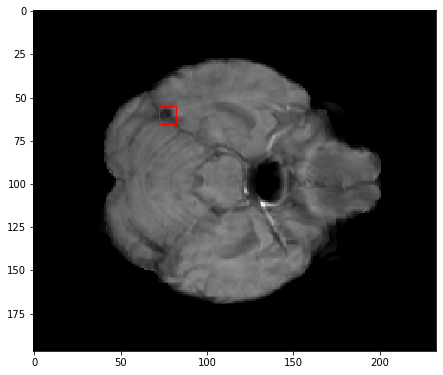

In [40]:
pdataset.disp_detection('1',58)  
#This is not a CMB .... Need to remove it from the dataset labels

In [26]:
#Setting the wrong labelled points to zero.....
pdataset.dataset.loc[58, 'label'] = 0
pdataset.dataset.loc[56, 'label'] = 0

In [30]:
#Remaining labels in the patient 1 are now correct
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '1')]

,RST_peak,image_patch,label,patient_name
47,"[151, 102, 63]","[[[1945.9607, 1910.2585, 1863.1324, 1812.476, ...",1,1
52,"[131, 85, 69]","[[[1325.6112, 1283.7367, 1238.4597, 1224.3926,...",1,1


In [31]:
#CMB labels for patient 2
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '2')]

,RST_peak,image_patch,label,patient_name
37,"[122, 33, 72]","[[[1774.0656, 1767.2006, 1729.4329, 1708.2155,...",1,2


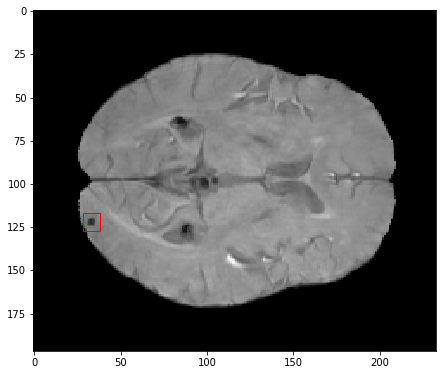

In [33]:
pdataset.disp_detection('2',37)
#The labels in the patient 2 are completely correct

In [34]:
#CMB labels for patient 3
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '3')]

,RST_peak,image_patch,label,patient_name
227,"[77, 38, 98]","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",1,3


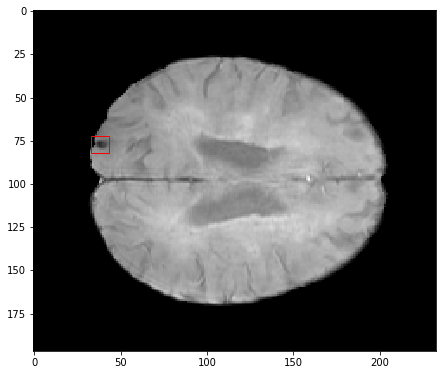

In [35]:
pdataset.disp_detection('3',227)
#The labels in the patient 3 are completely correct

In [36]:
#CMB labels for patient 4
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '4')]

,RST_peak,image_patch,label,patient_name
212,"[150, 100, 75]","[[[1993.5889, 2027.2733, 2019.5259, 2015.476, ...",1,4
214,"[60, 141, 51]","[[[1885.6003, 1853.675, 1800.5067, 1746.5947, ...",1,4
215,"[53, 49, 81]","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",1,4


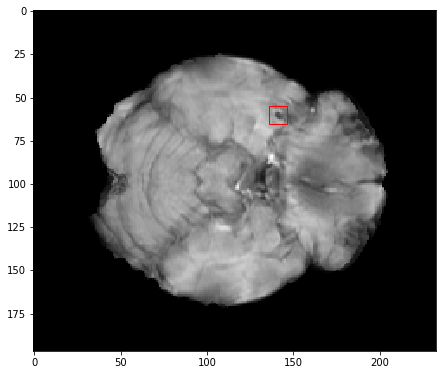

In [38]:
#All the labels are correct....As checked using MRICRON
pdataset.disp_detection('4',214)

In [39]:
#CMB labels for patient 5
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '5')]

,RST_peak,image_patch,label,patient_name
446,"[142, 133, 82]","[[[2551.3567, 2555.9075, 2553.1658, 2540.4075,...",1,5
449,"[139, 142, 65]","[[[2408.4695, 2475.584, 2553.3855, 2612.0293, ...",1,5
450,"[138, 142, 69]","[[[2688.436, 2751.2214, 2771.8093, 2783.0876, ...",1,5
459,"[117, 105, 61]","[[[1809.8258, 1731.849, 1562.9722, 1338.0624, ...",1,5
466,"[95, 149, 56]","[[[1974.1235, 1878.3071, 1924.5144, 2106.6187,...",1,5


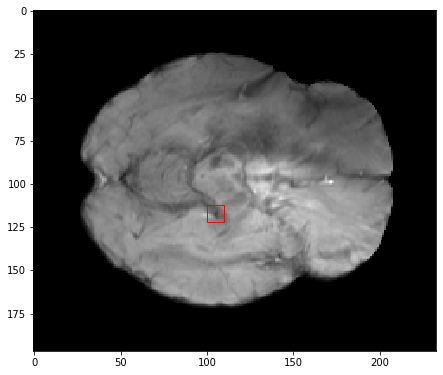

In [43]:
pdataset.disp_detection('5',459)
#This is not a CMB.....Also confirmed using MRIcron and Dr. Hazarika

In [44]:
#Setting the wrong labelled points to zero.....
pdataset.dataset.loc[446, 'label'] = 0
pdataset.dataset.loc[450, 'label'] = 0  #Repeating point with misplaced center
pdataset.dataset.loc[459, 'label'] = 0
pdataset.dataset.loc[466, 'label'] = 0

In [45]:
#Remaining labels in the patient 5 are now correct
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '5')]

,RST_peak,image_patch,label,patient_name
449,"[139, 142, 65]","[[[2408.4695, 2475.584, 2553.3855, 2612.0293, ...",1,5


In [46]:
#CMB labels for patient 6
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '6')]

,RST_peak,image_patch,label,patient_name
140,"[134, 110, 37]","[[[0.0, 0.0, 0.0, 196.0366, 143.74533, 250.047...",1,6
141,"[132, 149, 28]","[[[1450.9822, 1510.8649, 1566.1918, 1608.9363,...",1,6
147,"[124, 88, 75]","[[[2143.4924, 2137.8994, 2135.98, 2142.6934, 2...",1,6
149,"[119, 126, 135]","[[[2290.9626, 2310.4807, 2318.1333, 2322.1401,...",1,6
155,"[110, 139, 54]","[[[342.14502, 956.3019, 1422.5354, 1558.2509, ...",1,6
156,"[110, 103, 115]","[[[2215.8376, 2217.8628, 2196.3394, 2174.253, ...",1,6
183,"[85, 140, 54]","[[[1814.7252, 1721.9404, 1629.695, 1473.8016, ...",1,6
186,"[80, 139, 53]","[[[2202.0847, 2237.8328, 2240.1602, 2214.826, ...",1,6
188,"[77, 140, 44]","[[[2046.9435, 2091.3289, 2136.6199, 2180.5178,...",1,6
199,"[59, 144, 22]","[[[0.0, 0.0, 0.0, 434.43127, 1138.0171, 1221.4...",1,6


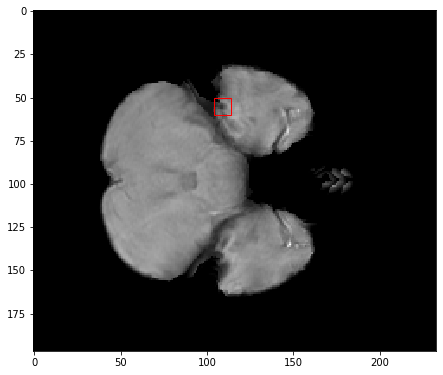

In [55]:
pdataset.disp_detection('6',203)
#Not a CMB....nothing seen on MRIcron as well

In [57]:
#Setting the wrong labelled points to zero.....
pdataset.dataset.loc[140, 'label'] = 0
pdataset.dataset.loc[141, 'label'] = 0
pdataset.dataset.loc[147, 'label'] = 0
pdataset.dataset.loc[149, 'label'] = 0
pdataset.dataset.loc[155, 'label'] = 0
pdataset.dataset.loc[156, 'label'] = 0
pdataset.dataset.loc[183, 'label'] = 0
pdataset.dataset.loc[186, 'label'] = 0
pdataset.dataset.loc[188, 'label'] = 0
pdataset.dataset.loc[199, 'label'] = 0
pdataset.dataset.loc[202, 'label'] = 0
pdataset.dataset.loc[203, 'label'] = 0

In [58]:
#Remaining labels in the patient 6 are now correct
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '6')]
#No correct CMBs detected in this case

,RST_peak,image_patch,label,patient_name


In [59]:
#CMB labels for patient 7
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '7')]

,RST_peak,image_patch,label,patient_name
375,"[140, 154, 45]","[[[1688.382, 1597.4652, 1475.8611, 1365.1674, ...",1,7
380,"[131, 142, 52]","[[[1690.1099, 1668.2125, 1653.0569, 1564.124, ...",1,7
387,"[122, 90, 59]","[[[1432.6627, 1474.22, 1594.2905, 1735.7402, 1...",1,7
389,"[116, 106, 62]","[[[1445.7876, 1448.7748, 1428.6733, 1410.3706,...",1,7
391,"[110, 141, 125]","[[[1772.6095, 1765.7646, 1773.8698, 1790.8541,...",1,7
418,"[73, 84, 51]","[[[1494.8796, 1504.3376, 1480.5326, 1433.6578,...",1,7
435,"[30, 103, 63]","[[[116.86486, 304.68124, 447.71936, 507.62054,...",1,7


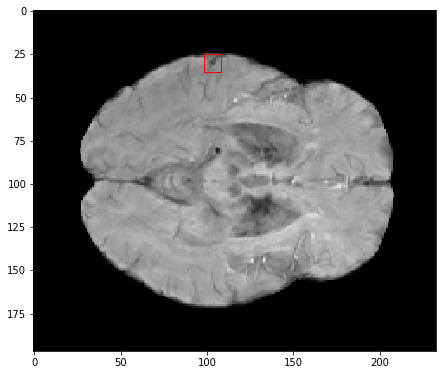

In [70]:
pdataset.disp_detection('7',435)
#This is the edge of the cortex region

In [71]:
#Setting the wrong labelled points to zero.....
pdataset.dataset.loc[375, 'label'] = 0
pdataset.dataset.loc[380, 'label'] = 0   #Blood vessel end looking like microbleed
pdataset.dataset.loc[389, 'label'] = 0 
pdataset.dataset.loc[391, 'label'] = 0 
pdataset.dataset.loc[418, 'label'] = 0 
pdataset.dataset.loc[435, 'label'] = 0 #Sulcii and edges of the cortex

In [72]:
#Remaining labels in the patient 7 are now correct
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '7')]
#No correct CMBs detected in this case

,RST_peak,image_patch,label,patient_name
387,"[122, 90, 59]","[[[1432.6627, 1474.22, 1594.2905, 1735.7402, 1...",1,7


In [73]:
#CMB labels for patient 8
k = pdataset.dataset
k.loc[(k['label'] == 1) & (k['patient_name'] == '8')]

,RST_peak,image_patch,label,patient_name
100,"[145, 97, 90]","[[[2576.3916, 2574.2893, 2554.3533, 2532.3188,...",1,8
102,"[141, 71, 82]","[[[2134.3745, 2138.9934, 2172.1443, 2210.0732,...",1,8
104,"[137, 167, 98]","[[[2111.8208, 2146.8962, 2175.7349, 2199.1118,...",1,8
110,"[86, 182, 62]","[[[2203.7852, 2308.6045, 2387.8716, 2453.87, 2...",1,8
111,"[86, 181, 58]","[[[2039.4565, 2092.0078, 2142.0762, 2189.4058,...",1,8
112,"[65, 145, 75]","[[[1850.9977, 1777.6261, 1713.4049, 1655.6232,...",1,8
113,"[65, 145, 70]","[[[2052.042, 2071.882, 2063.082, 2001.6915, 19...",1,8
114,"[61, 110, 75]","[[[1180.2657, 1180.0599, 1237.1514, 1302.8916,...",1,8
115,"[60, 153, 33]","[[[1767.4229, 1840.2651, 1912.6459, 1865.2168,...",1,8
116,"[58, 80, 126]","[[[1480.1185, 1472.2357, 1457.7295, 1503.3276,...",1,8


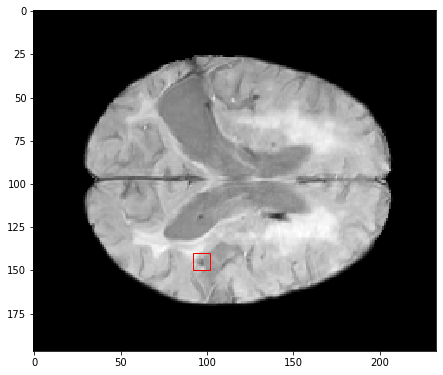

In [74]:
pdataset.disp_detection('8',100)


In [ ]:
#Setting the wrong labelled points to zero.....
pdataset.dataset.loc[100, 'label'] = 0